# 프로젝트 : SRGAN 활용하기

## 프로젝트 1: 직접 고른 이미지로 SRGAN 실험하기
### 1. 고해상도 이미지 불러오기

(500, 780, 3)


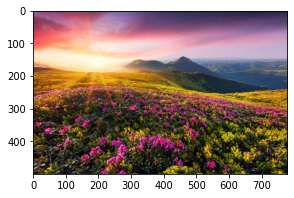

In [17]:
import cv2
import os
from skimage import data
import matplotlib.pyplot as plt

image_path = os.getenv('HOME')+'/aiffel/super_resolution/img1.jpg'
hr_image = cv2.imread(image_path)
hr_image = cv2.cvtColor(hr_image, cv2.COLOR_BGR2RGB)

print(hr_image.shape)    # 이미지의 크기를 출력합니다.

plt.figure(figsize=(6,3))
plt.imshow(hr_image)

### 2. bicubic interpolation을 적용과 1/4 리사이즈

(125, 195, 3)


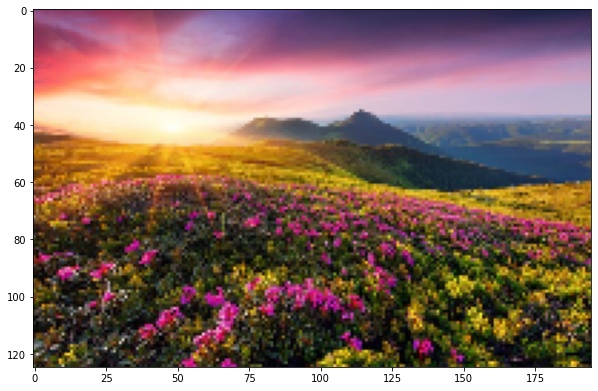

In [18]:
lr_image = cv2.resize(hr_image, dsize=(hr_image.shape[1]//4,hr_image.shape[0]//4)) # (가로 픽셀 수, 세로 픽셀 수)
print(lr_image.shape)

plt.figure(figsize=(10,10))
plt.imshow(lr_image)

### 3. SRGAN을 이용해 고해상도 이미지를 생성

In [19]:
import tensorflow as tf
import os

model_file = os.getenv('HOME')+'/aiffel/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

In [21]:
import numpy as np

def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

srgan_hr = apply_srgan(lr_image)

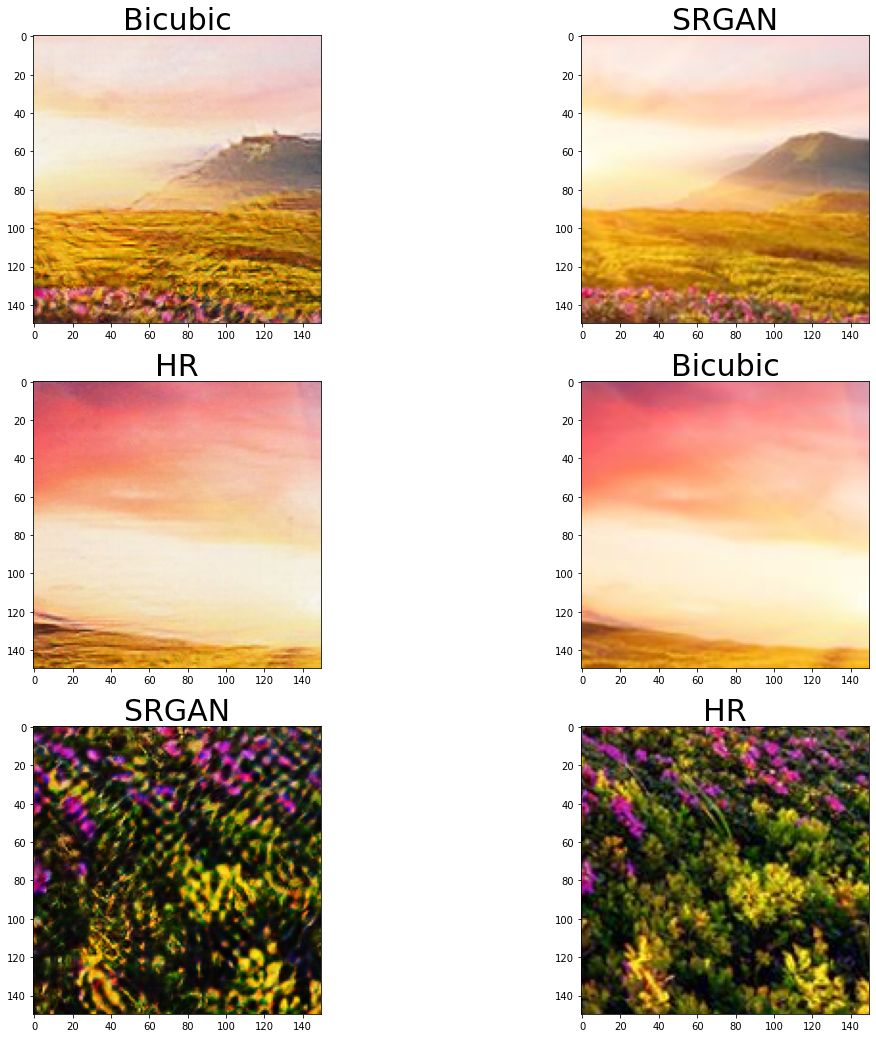

In [31]:
# 이미지의 특정 부분을 잘라내는 함수를 정의합니다.
def crop(image, left_top, x=200, y=200):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]

# 자세히 시각화 하기 위해 3개 영역을 잘라냅니다.
# 아래는 잘라낸 부분의 좌상단 좌표 3개 입니다.
left_tops = [(100,200), (50,40), (300,500)]

images = []
for left_top in left_tops:
    img1 = crop(srgan_hr, left_top, 150, 150)
    img2 = crop(hr_image, left_top, 150, 150)
    images.extend([img1, img2])
    
labels = ["Bicubic", "SRGAN", "HR"] * 3

plt.figure(figsize=(18,18))
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.imshow(images[i])
    plt.title(labels[i], fontsize=30)

bicubic: (500, 780, 3)


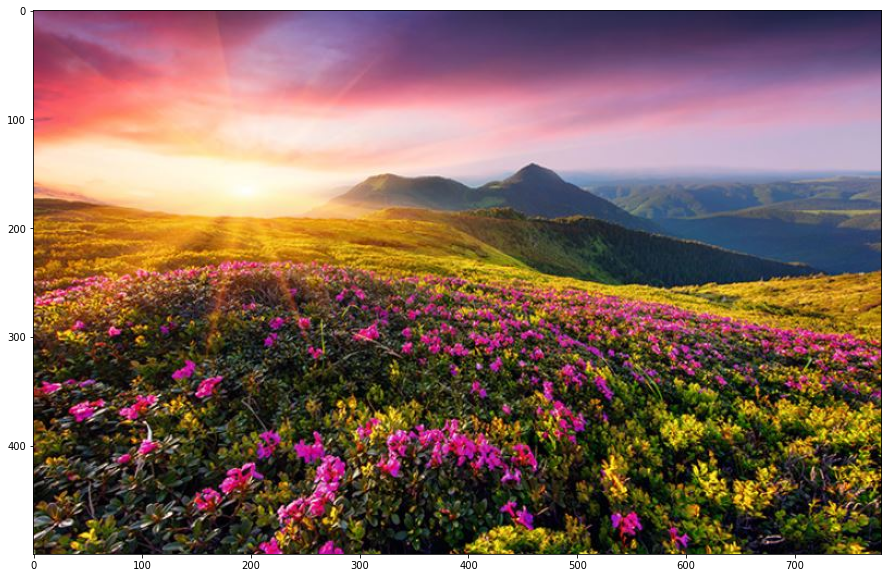

In [34]:
bicubic_hr = cv2.resize(hr_image, dsize=(image.shape[1], image.shape[0]), interpolation=cv2.INTER_CUBIC) # 원본사이즈로 복원
print('bicubic:', hr_image.shape)

plt.figure(figsize=(20,10))
plt.imshow(hr_image)